# 🛍️ Mall Customers Clustering

### Customer segmentation using KMeans on Mall Customers dataset.

1. Import Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

2. Load Dataset

In [84]:
data = pd.read_csv(r"C:\Users\dubai key\Documents\my folders\machine learning\tasks\mall customers clustring model\Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


3. Exploratory Data Analysis (EDA)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [86]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [87]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

4. Data preprocessing

In [88]:
data.drop(columns="CustomerID",inplace= True)
data

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [89]:
data["Genre"] = pd.get_dummies(data["Genre"], drop_first= True,dtype= int)
data.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [90]:
# applied minmaxscaler on data
scaler = MinMaxScaler()
dataScaled = scaler .fit_transform(data)
dataScaled_DF = pd .DataFrame(dataScaled, columns = data .columns)
dataScaled_DF.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


4. Visualize raw data

C:\Users\dubai key\AppData\Local\Temp\ipykernel_20900\3106586698.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=dataScaled_DF, x="PCA1", y="PCA2", palette="tab10")


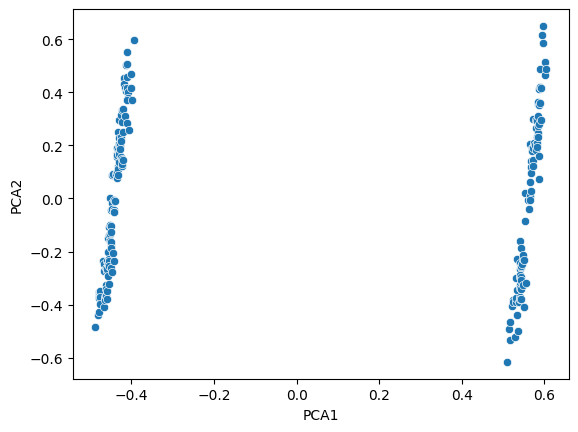

In [91]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(dataScaled_DF)

dataScaled_DF["PCA1"] = X_pca[:,0]
dataScaled_DF["PCA2"] = X_pca[:,1]

sns.scatterplot(data=dataScaled_DF, x="PCA1", y="PCA2", palette="tab10")
plt.show()

4. Eblow method

In [92]:
lst = []
k_rng = [1,2,3,4,5,6,7,8,9,10]
for k in k_rng:
    km = KMeans(n_clusters= k, random_state=42)
    km.fit(dataScaled_DF)
    lst.append(km .inertia_)

[154.7107021750757,
 55.89397087990305,
 41.57776958034693,
 26.17475932969148,
 22.580135102019455,
 20.45469438286044,
 18.54232197570444,
 16.439603224506826,
 14.92300290339087,
 12.958103068097053]

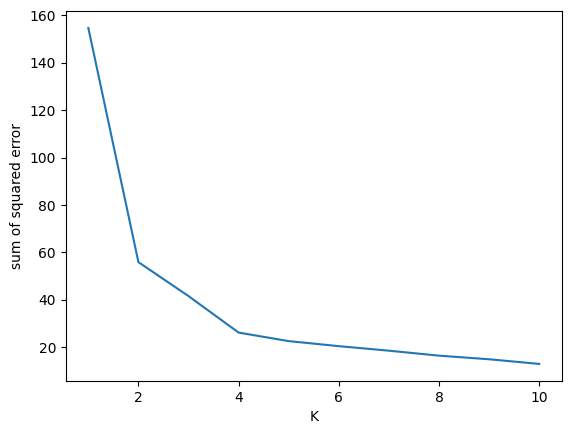

In [93]:
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k_rng,lst)
lst

5. kmeans clustering

In [94]:
kmeans = KMeans(n_clusters=4, random_state=42 )
kmeans.fit_predict(dataScaled_DF)
data["Cluster"] = kmeans.labels_


6. kmeans clustring visualizations

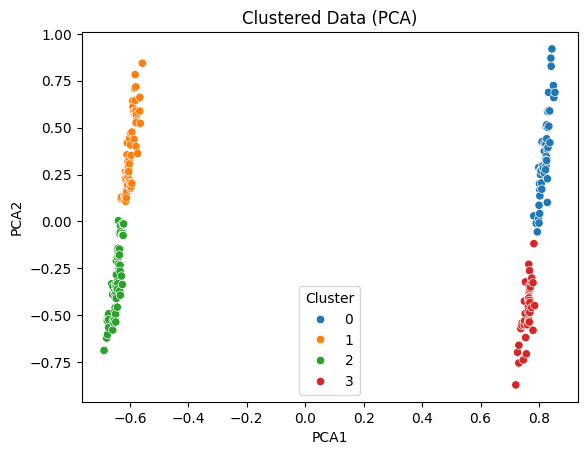

In [95]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(dataScaled_DF)

data["PCA1"] = X_pca[:, 0]
data["PCA2"] = X_pca[:, 1]

sns.scatterplot(data=data, x="PCA1", y="PCA2", hue="Cluster", palette="tab10")
plt.title("Clustered Data (PCA)")
plt.show()

In [96]:
data.drop(columns=["PCA1", "PCA2"], inplace= True)
data.groupby("Cluster").mean()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,1.0,49.437500,62.416667,29.208333
1,0.0,48.109091,58.818182,34.781818
2,0.0,28.438596,59.666667,67.684211
3,1.0,28.250000,62.000000,71.675000


In [97]:
score = silhouette_score(dataScaled_DF, kmeans.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.4514887287854835


8. Cluster Interpretation

- **Cluster 0**: عملاء أكبر سنًا، دخل متوسط، إنفاق قليل → مقتصدين.
- **Cluster 1**: رجال كبار سن، دخل متوسط، إنفاق قليل → محافظين.
- **Cluster 2**: شباب ذكور، دخل متوسط، إنفاق عالي → مسرفين.
- **Cluster 3**: شابات، دخل متوسط، إنفاق عالي جدًا → High-Spenders (VIP).
